観測したballの色リストを空白区切りで指定してください． 0:red 1:white >>> 0 0 0
初期値：0.5
1回目：0.625
2回目：0.7352941176470588
3回目：0.8223684210526315


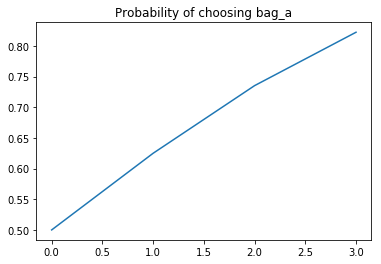

In [2]:
#2つの袋のどちらから球を無作為復元抽出しているかBayes推定する
#参考：https://qiita.com/tadOne/items/dcff3e52ea4956008519

import matplotlib.pyplot as plt
%matplotlib inline

bag_a = 0
bag_b = 1

ball_red = 0
ball_white = 1

#prior
_prob_bag = []
_prob_bag.insert(bag_a, 1/2)
_prob_bag.insert(bag_b, 1/2)

_prob_ball = []

#bag_a内の構成
_prob_ball_a = []
_prob_ball_a.insert(ball_red,2/3)
_prob_ball_a.insert(ball_white,1/3)
_prob_ball.insert(bag_a, _prob_ball_a)

#bag_b内の構成
_prob_ball_b = []
_prob_ball_b.insert(ball_red,2/5)
_prob_ball_b.insert(ball_white,3/5)
_prob_ball.insert(bag_b, _prob_ball_b)

def posterior(ball_list, bag):
    if len(ball_list) == 1:
        return _prob_ball[bag][ball_list[0]] * _prob_bag[bag]
    else:
        return _prob_ball[bag][ball_list[0]] * posterior(ball_list[1:], bag)
    
def posterior_a(ball_list):
    return posterior(ball_list, bag_a) / (posterior(ball_list, bag_a) + posterior(ball_list, bag_b))

string = input("観測したballの色リストを空白区切りで指定してください． 0:red 1:white >>> ")
string_list = string.split()
ball_list = []
for i in string_list:
    ball_list.append(int(i))
result_a = [_prob_bag[bag_a]]

print("初期値：" + str(result_a[0]))
for i in range(len(ball_list)):
    val = posterior_a(ball_list[0:i+1])
    result_a.append(val)
    print(str(i+1) + "回目：" + str(val))
    
plt.title("Probability of choosing bag_a") 
plt.plot(result_a)